# Writing your first Immediate Mode applications

Let's start by creating a simple application "Hello, World" application, where we will demonstrate several aspects of ImGui and Hello ImGui.

## Hello, World! Display text and images

We will start by displaying a text and an image in the application window, with the following steps:
1. We define a gui function that will be called by Hello ImGui at every frame: It will display the GUI of our application *and* handle user events.
2. We use the `imgui.text()` function to display a text in the window.
3. We use `hello_imgui.im_texture_id_from_asset()` to load an image from an asset file, and `imgui.image()` to display it, with a size of 100x100 pixels.
4. We call `hello_imgui.run()` to start the application, optionally specifying the window title and size.


Notes: 
- Dear ImGui is not able to load images by itself, so we use Hello ImGui's `image_from_asset()` function to load and display an image. 
- The image will either be loaded from a path relative to the assets folder, or via a full path provided as an argument to `image_from_asset()`.
- Look at the Hello ImGui tutorial for more information on how to start a Hello ImGui application, and how to load images.


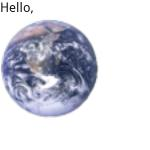

In [44]:
from imgui_bundle import imgui, hello_imgui, ImVec2

def gui():                                                                  # 1.
    # Display a label saying "Hello, "
    imgui.text("Hello, ")                                                   # 2.

    # Display an image from the "assets/" folder
    texture_id = hello_imgui.im_texture_id_from_asset("images/world.png")   # 3.
    imgui.image(texture_id, ImVec2(100, 100))                               # 3.


hello_imgui.run(gui, window_title="Hello, World!", window_size=(150, 150))  # 4.

```cpp
#include "imgui.h"
#include <hello_imgui/hello_imgui.h>

void Gui() {                                                                // 1.
    // Display a label saying "Hello,"
    ImGui::Text("Hello, ");                                                 // 2.

    // Display an image from the "assets/" folder
    auto texture_id = HelloImGui::ImTextureIdFromAsset("images/world.png"); // 3.
    ImGui::Image(texture_id, ImVec2(100, 100));                             // 3.
}

int main() {
    HelloImGui::Run(                                                        // 4.
        Gui,             // guiFunction
        "Hello, World!", // windowTitle
        false,           // windowSizeAuto
        false,           // windowRestorePreviousGeometry
        {400, 300});     // windowSize
}
```

## Handling button clicks

We will now handle the click events, with the following steps:

1. Add an AppState class to store the state of the application. This is a recommended best practice, as it allows to separate the GUI code from the business logic.
2. Add a counter to the AppState. This counter will be incremented each time a button is clicked.
3. Let the gui function take an AppState as an argument (and possibly modify it).
4. Add a button to the GUI, with `imgui.button()`, and increment the counter when the button is clicked.
5. Add a tooltip to the button, to display a message when the user hovers over it.
6. Add a button to exit the application (see note below).
7. Create a main() function to run the application, where we create an AppState object
8. Create a lambda function to call the gui function with the AppState object as an argument.
9. Call `hello_imgui.run()` with the lambda function as an argument.

*Note: In the case of a web application, such as in this tutorial, the "exit" button will not have any effect. In the case of a desktop application, it will close the window.*

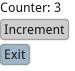

In [ ]:
from imgui_bundle import imgui, hello_imgui

class AppState:                                               # 1.
    counter: int = 0                                          # 2.

def gui(app_state: AppState):                                 # 3.
    imgui.text(f"Counter: {app_state.counter}")
    if imgui.button("Increment"):                             # 4.
        app_state.counter += 1
    imgui.set_item_tooltip("Click to increment the counter")  # 5.

    if imgui.button("Exit"):
        hello_imgui.get_runner_params().app_shall_exit = True # 6.

def main():                                                   # 7.
    app_state = AppState()                                    # 7.
    gui_fn = lambda: gui(app_state)                           # 8.
    hello_imgui.run(gui_fn)                                   # 9.

if __name__ == "__main__":                                    # 7.
    main()                                                    # 7.

```cpp
#include "imgui.h"
#include <hello_imgui/hello_imgui.h>

class AppState {                                                // 1.
public:
    int counter = 0;                                            // 2.
};


void Gui(AppState& appState) {                                  // 3.
    ImGui::Text("Counter: %d", appState.counter);
    if (ImGui::Button("Increment")) .                           // 4.
        appState.counter++;
    ImGui::SetItemTooltip("Click to increment the counter");    // 5.

    if (ImGui::Button("Exit")) {                                // 6.
        HelloImGui::GetRunnerParams()->appShallExit = true;
    }
}

int main() {
    AppState appState;                                          // 7.
    auto gui_fn = [&]() { Gui(appState); }; // 8.
    HelloImGui::Run(gui_fn, "Handling Button Clicks", false, false, {400, 300}); // 9.
}
```

## Using widgets to edit values

We will now create an application which displays a globe and allows the user to set the size of the globe.


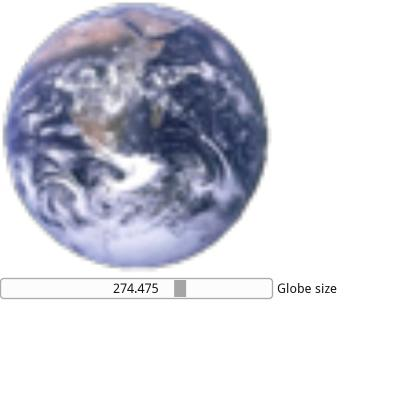

In [26]:
from imgui_bundle import imgui, hello_imgui, ImVec2

class AppState:
    # Add a globe_size attribute to the AppState class
    globe_size: float = 100.0

def gui(app_state: AppState):
    # hello_imgui.image_from_asset will keep the aspect ratio of the image
    # if one of the dimensions is set to 0
    hello_imgui.image_from_asset("images/world.png", ImVec2(app_state.globe_size, 0))

    # Display a slider to change the globe size
    # In Python, ImGui widgets often return a tuple of (value_changed: bool, new_value: ...), 
    # hence we store the first element of the tuple in a variable called _changed, 
    # and the second element in app_state.globe_size
    #
    # Note: This is specific to Python bindings. 
    #       In C++, the return value of ImGui::SliderFloat would be a single bool 
    #       and it would modify the globe_size variable directly (passed by pointer).
    #       The equivalent C++ code would be:
    #            bool changed = ImGui::SliderFloat(
    #                                "Globe size", &globe_size, 20.0, 400.0);
    _changed, app_state.globe_size = imgui.slider_float("Globe size", app_state.globe_size, 20.0, 400.0)


def main():
    app_state = AppState()
    gui_fn = lambda: gui(app_state)
    hello_imgui.run(gui_fn, window_title="Hello, World!", window_size=(420, 420))

if __name__ == "__main__":
    main()

```cpp
#include "hello_imgui/hello_imgui.h"
#include "imgui.h"

class AppState {
public:
    // Add a globe_size attribute to the AppState class
    float globe_size = 100.0f;
};

// Define the GUI function
void Gui(AppState& app_state) {
    // hello_imgui::ImageFromAsset will keep the aspect ratio of the image
    // if one of the dimensions is set to 0
    HelloImGui::ImageFromAsset("images/world.png", ImVec2(app_state.globe_size, 0.0f));

    // Display a slider to change the globe size
    // In C++, ImGui widgets modify variables directly using pointers.
    // The return value of ImGui::SliderFloat is a bool indicating whether the value was changed.
    //
    // Note: This differs from Python bindings, where the method returns a tuple (changed, value).
    // Here, we simply pass a pointer to app_state.globe_size.
    bool changed = ImGui::SliderFloat("Globe size", &app_state.globe_size, 20.0f, 400.0f);
    // `changed` is true if the slider's value was modified, but we don't use it here.
}

int main() {
    AppState app_state;
    auto gui_fn = [&]() { Gui(app_state); };
    HelloImGui::Run(gui_fn, "Hello, World!", false, false, {420, 420});
}
```

# Advices to layout your GUI

* Widget labels need to be unique, so you can use a suffix to create a unique identifier for a widget by adding a suffix "##some_suffix", which will not be displayed : see [FAQ](https://github.com/ocornut/imgui/blob/master/docs/FAQ.md#q-about-the-id-stack-system)
* You can use horizontal and vertical layouts to create columns and rows.
* You can use the `imgui.set_next_item_with` function to set the width of the next widget.

**Using em units**

It is important to use em units (see https://en.wikipedia.org/wiki/Em_(typography) ), in order to create application whose layout adapts to the font size,  and does not depend on the screen resolution and scaling.

Hello ImGui provides several helper functions to convert between pixels and em units:

*In Python*
```python
hello_imgui.em_to_vec2(em_width: float, em_height: float) -> ImVec2
hello_imgui.em_size(em: float = 1.0) -> float
hello_imgui.pixels_to_em(px_width: float, px_height: float) -> ImVec2
```

*In C++*
```cpp
ImVec2 HelloImGui::EmToVec2(float em_width, float em_height);
float HelloImGui::EmSize(float em = 1.0f);
ImVec2 HelloImGui::PixelsToEm(float px_width, float px_height);
```

The code below illustrates these techniques:


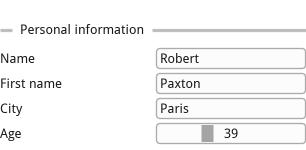

In [42]:
from imgui_bundle import imgui, hello_imgui, imgui_ctx


class AppState:
    """Our application state"""
    name: str = ""
    first_name: str = ""
    city: str = ""
    age: int = 0


def input_text_aligned(label: str, value: str, width_pixel: float) -> tuple[bool, str]:
    """A helper function to create a label and an input text field in the same row, 
    where the label is placed to the left, and the input field is right-aligned.
    It returns a tuple of (changed: bool, value: str), following the pattern of imgui.input_text.
    """
    # We will use an horizontal layout to place the label and the input field in the same row
    # (by default, imgui places widgets vertically)
    with imgui_ctx.begin_horizontal(label):
        # Display the label on the left side
        imgui.text(label)
        # Add a spring, which will occupy all remaining space:
        # this will push the input field to the right
        imgui.spring()
        imgui.set_next_item_width(width_pixel)
        # Note: by default, imgui.input_text will place the label to the right of the input field.
        # We do not want that, so we will use "##" to hide the label. We still need to make it unique,
        # so we append the user provided label to it (which will not be displayed).
        changed, value = imgui.input_text("##" + label, value)
    return changed, value


def gui(app_state: AppState):
    # Set the width of the widgets: we will use 10 em for most widgets
    widgets_width = hello_imgui.em_size(10)

    # Add some spacing at the top: we will skip 1 line of text
    imgui.dummy(hello_imgui.em_to_vec2(0, 1))

    # Enclose the widgets in a vertical layout: this is important, so that 
    # the inner horizontal layouts use their parent's layout width.
    with imgui_ctx.begin_vertical("main"):
        imgui.separator_text("Personal information")
        imgui.dummy(hello_imgui.em_to_vec2(20, 0))
        _, app_state.name = input_text_aligned("Name", app_state.name, widgets_width)
        _, app_state.first_name = input_text_aligned("First name", app_state.first_name, widgets_width)
        _, app_state.city = input_text_aligned("City", app_state.city, widgets_width)

        # Add a slider to input the age: we enclose it in a horizontal layout
        with imgui_ctx.begin_horizontal("Age"):
            imgui.text("Age")
            # Add a spring to push the slider to the right
            imgui.spring()
            # Set the width of the slider to 10 em (by default, it would be the full width of the window)
            imgui.set_next_item_width(widgets_width)
            # use imgui.slider_int with a hidden label, and a range from 0 to 120
            _, app_state.age = imgui.slider_int("##Age", app_state.age, 0, 120)


def main():
    app_state = AppState()
    hello_imgui.run(lambda: gui(app_state))


if __name__ == "__main__":
    main()

# What's next?

- There are **many** other widgets in Dear ImGui, and Dear ImGui Bundle. Look at the next pages of this tutorial for more examples.
- Look at [Dear ImGui Manual](https://pthom.github.io/imgui_manual_online/manual/imgui_manual.html)
